# Plotting With Pandas Exercise
This set of exercises will require you to use Pandas' plotting functionality alongside some matplotlib methods.  

* **All charts use the `billboard_charts.csv` dataset.**  
* **Import that dataset and parse the `date` column as a date.**
* **Use the matplotlib theme `ggplot`**

## Part 1

Create the bar plot seen in the image below.  It visualizes the top 10 artists who have spent the most weeks at number 1 in the dataset.

* Notice the customized title
* The figure is 8x6
* Add in the x-axis label
* The plot uses the ggplot matplotlib theme
* The bars have a black edge with a width of 3.  You'll need to add that in yourself!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
billboard = pd.read_csv('DataAnalysis/data/billboard_charts.csv', parse_dates=['date'])

In [3]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            330087 non-null  datetime64[ns]
 1   rank            330087 non-null  int64         
 2   song            330087 non-null  object        
 3   artist          330087 non-null  object        
 4   last-week       297775 non-null  float64       
 5   peak-rank       330087 non-null  int64         
 6   weeks-on-board  330087 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.6+ MB


In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('ggplot')

In [6]:
top_10 = billboard[billboard['rank'] == 1]['artist'].value_counts().head(10)

In [7]:
billboard.shape

(330087, 7)

Text(0.5, 0, 'Weeks At #1')

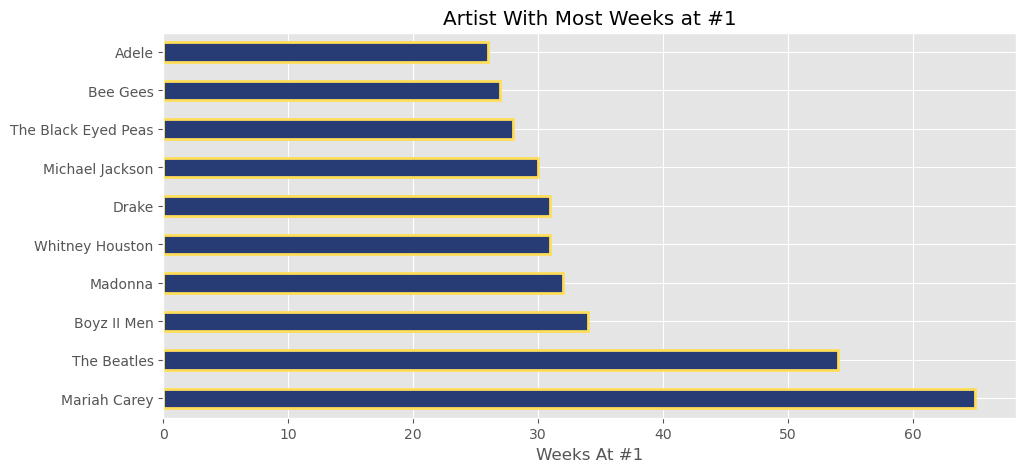

In [8]:
plt.figure(figsize=(11,5))
top_10.plot.barh(color = '#273c75', edgecolor = '#ffdd59', linewidth = 2)
plt.title('Artist With Most Weeks at #1')
plt.xlabel('Weeks At #1')


In [9]:
top_10

Mariah Carey           65
The Beatles            54
Boyz II Men            34
Madonna                32
Whitney Houston        31
Drake                  31
Michael Jackson        30
The Black Eyed Peas    28
Bee Gees               27
Adele                  26
Name: artist, dtype: int64

## Part 2

Please create the pie chart seen in the image below.  It visualizes the various artists who charted with the song "Please Mr. Postman".  

* Add in the custom title
* Use this list of colors: `colors = ["#6c5ce7","#00cec9", "#74b9ff"]`
* Explode the "Gentle Persuasion" slice by 0.1

<AxesSubplot:title={'center':'Please Mr. Postman Versons'}, ylabel='Artist'>

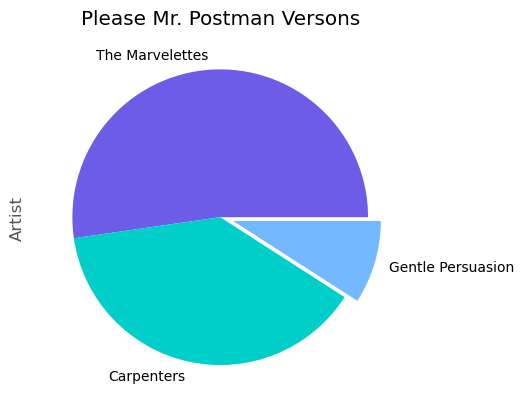

In [28]:
billboard[billboard['song'] == 'Please Mr. Postman']['artist'].value_counts().plot.pie(
    colors = ["#6c5ce7","#00cec9", "#74b9ff"],
    title = 'Please Mr. Postman Versons',
    explode = (0,0,0.09),
    ylabel= 'Artist'
)


## Part 3
Create the line plot seen in the image below. It visualizes the performance of the song "Blinding Lights"

* The figure is 9x5
* The line color is `#a29bfe`
* To invert the y-axis (so that rank 1 is the highest value), use: `plt.gca().invert_yaxis()`

Text(0.5, 1.0, 'Blinding Lights Chart Performance')

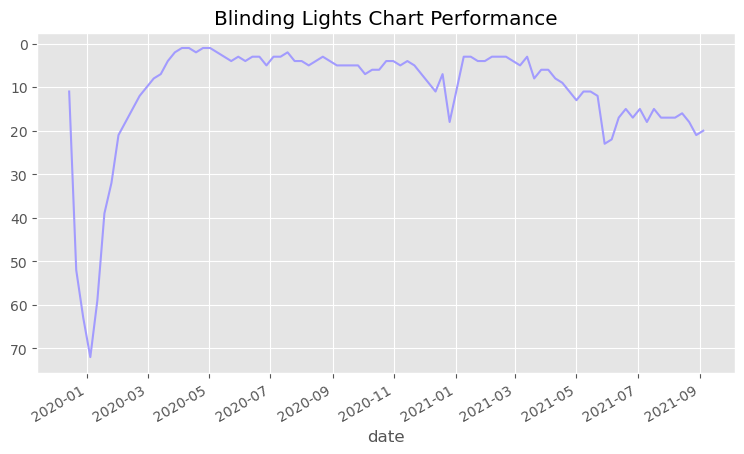

In [51]:
plt.figure(figsize=(9,5))
billboard[billboard['song'] == 'Blinding Lights'].set_index('date')['rank'].plot(color = '#a29bfe')
plt.gca().invert_yaxis()
plt.title('Blinding Lights Chart Performance')

In [33]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            330087 non-null  datetime64[ns]
 1   rank            330087 non-null  int64         
 2   song            330087 non-null  object        
 3   artist          330087 non-null  object        
 4   last-week       297775 non-null  float64       
 5   peak-rank       330087 non-null  int64         
 6   weeks-on-board  330087 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.6+ MB


## Part 4

Create the line plot seen in the image below.  It shows the chart performance (rank) of the following songs:

* All I Want For Christmas Is You by Mariah Carey
* Rockin' Around The Christmas Tree by Brenda Lee
* Jingle Bell Rock by Bobby Helms

**The date range spans from 2016-12-25 to 2021-01-01**

Notice the customized x-axis tick marks, the legend, the title, and the axis labels! Also the figure is `10x7`

To invert the y-axis, use `plt.gca().invert_yaxis()`

In [53]:
billboard['year'] = billboard.date.dt.year

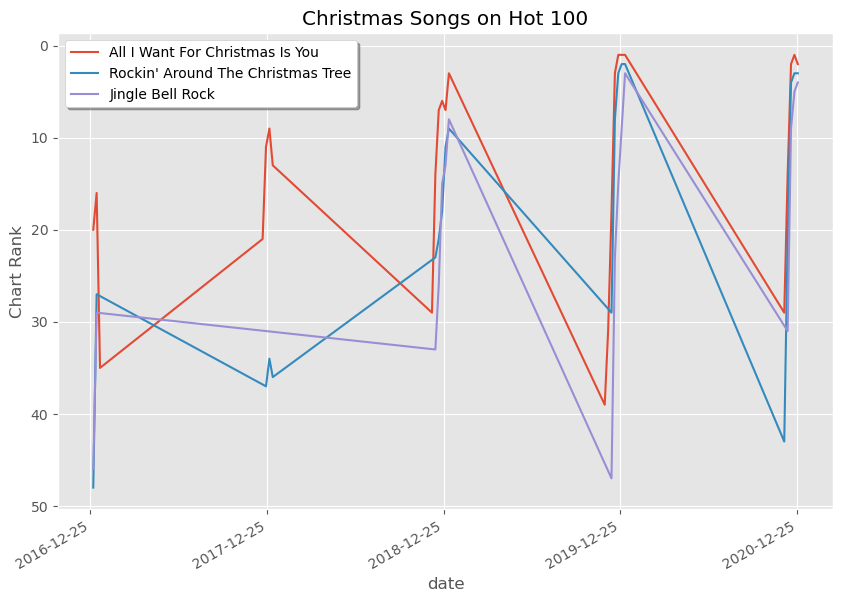

In [100]:
plt.figure(figsize=(10,7))
df = billboard[billboard.date.between('2016-12-25', '2021-01-01')].set_index('date')
df[df['song'] == 'All I Want For Christmas Is You']['rank'].plot(label = 'All I Want For Christmas Is You')
df[(df['song'] == 'Rockin\' Around The Christmas Tree') & (df['artist'] == 'Brenda Lee')]['rank'].plot(label = 'Rockin\' Around The Christmas Tree')
df[df['song'] == 'Jingle Bell Rock']['rank'].plot(label = 'Jingle Bell Rock')
plt.legend(shadow = True, facecolor = 'white')
plt.gca().invert_yaxis()
plt.title('Christmas Songs on Hot 100')
plt.ylabel('Chart Rank')
plt.xticks(['2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25', '2020-12-25'],
           label = ['Xmas 2016', 'Xmas 2017', 'Xmas 2018', 'Xmas 2019', 'Xmas 2020'])
plt.show()

In [82]:
df

,rank,song,artist,last-week,peak-rank,weeks-on-board,year
date,,,,,,,
2020-12-26,1,Willow,Taylor Swift,NaN,1,1,2020
2020-12-26,2,All I Want For Christmas Is You,Mariah Carey,1.0,1,42,2020
2020-12-26,3,Rockin' Around The Christmas Tree,Brenda Lee,3.0,2,37,2020
2020-12-26,4,Jingle Bell Rock,Bobby Helms,5.0,3,34,2020
2020-12-26,5,Mood,24kGoldn Featuring iann dior,2.0,1,19,2020
...,...,...,...,...,...,...,...
2016-12-31,96,Selfish,PnB Rock,90.0,81,6,2016
2016-12-31,97,You're Welcome,Dwayne Johnson,92.0,83,3,2016
2016-12-31,98,My Sh*t,A Boogie Wit da Hoodie,91.0,89,9,2016


<AxesSubplot:xlabel='date'>

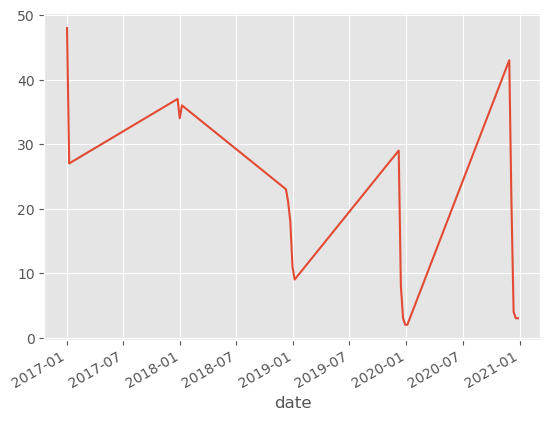

In [93]:
df[(df['song'] == 'Rockin\' Around The Christmas Tree') & (df['artist'] == 'Brenda Lee')]['rank'].plot()